# Data Sample

Sample a representing subset from the methabolite experiments. For this set the model predictions will be manually corrected and the model error will be used to compute error bars

In [1]:
import os
import shutil

import pandas as pd
import random

from matplotlib import pyplot as plt

random.seed(42)  # for reproducibility

# data folder
image_data_folder = "/Volumes/Extreme_SSD/Gastrointestinal_voucher/Metabolite_experiments/Image_files"
ctg_data_folder = "/Volumes/Extreme_SSD/Gastrointestinal_voucher/Metabolite_experiments/Mithras_files"

output_folder = os.path.join("metabolites_correct", "images")
sample_control = 1
sample_normal = 10 - sample_control*1

# experiment folder
exp_folder = {} # nesteed dictionary to hold experiment folders (organoid line, replicate, plate)

#update with correct paths
exp_folder["d131"] = {
    1: {
        1: "BF_B440_noBottomLayer_384WP_D131_P1_R1_1",
        2: "BF_B440_noBottomLayer_384WP_D131_P2_R1_1",
        3: "BF_B440_noBottomLayer_384WP_D131_P3_R1_1",
        4: "BF_B440_noBottomLayer_384WP_D131_P4_R1_1",
    },
    2: {
        1: "BF_B440_noBottomLayer_384WP_D131_7TFP_P1_R2_2024.11.26.11.54.18",
        2: "BF_B440_noBottomLayer_384WP_D131_7TFP_P2_R2_2024.11.26.12.21.41",
        3: "BF_B440_noBottomLayer_384WP_D131_7TFP_P3_R2_2024.11.26.12.49.31",
        4: "BF_B440_noBottomLayer_384WP_D131_7TFP_P4_R2_2024.11.26.13.15.26",
    },
}

exp_folder["d192"] = {
    1: {
        1: "BF_B440_noBottomLayer_384WP_D192_P1_R1_1",
        2: "BF_B440_noBottomLayer_384WP_D192_P2_R1_1",
        3: "BF_B440_noBottomLayer_384WP_D192_P3_R1_1",
        4: "BF_B440_noBottomLayer_384WP_D192_P4_R1_1", 
    },
    2: {
        1: "BF_B440_noBottomLayer_384WP_D192_7TFP_P1_R2_2024.11.26.12.03.06",
        2: "BF_B440_noBottomLayer_384WP_D192_7TFP_P2_R2_2024.11.26.12.31.23",
        3: "BF_B440_noBottomLayer_384WP_D192_7TFP_P3_R2_2024.11.26.12.58.03",
        4: "BF_B440_noBottomLayer_384WP_D192_7TFP_P4_R2_2024.11.26.13.23.56",
    },
}

ctg_file = {
    "d131": {
        1: {
            1: "20241119_YP_M3_genomicc_01_131_#1.TXT",
            2: "20241119_YP_M3_genomicc_01_131_#2.TXT",
            3: "20241119_YP_M3_genomicc_01_131_#3.TXT",
            4: "20241119_YP_M3_genomicc_01_131_#4.TXT",
        },
        2: {
            1: "D131_P1_R2.TXT",
            2: "D131_P2_R2.TXT",
            3: "D131_P3_R2_real.TXT",
            4: "D131_P4_R2.TXT",
        },
    },
    "d192": {
        1: {
            1: "20241119_YP_M3_genomicc_01_192_#1.TXT",
            2: "20241119_YP_M3_genomicc_01_192_#2.TXT",
            3: "20241119_YP_M3_genomicc_01_192_#3.TXT",
            4: "20241119_YP_M3_genomicc_01_192_#4.TXT",
        },
        2: {
            1: "D192_P1_R2.TXT",
            2: "D192_P2_R2.TXT",
            3: "D192_P3_R2.TXT",
            4: "D192_P4_R2.TXT",
        },  
    }
}

In [2]:
def get_image_paths(experiment_folder):
    """
    Returns a list of image paths for the given experiment folder.
    """
    image_paths = []
    for root, dirs, files in os.walk(experiment_folder):
        # Filter for .tif files
        for file in files:
            if file.startswith("."):
                continue
            if file.lower().endswith('.tif'):
                # Construct the full path and append to the list
                image_paths.append(os.path.join(root, file))
    return image_paths

def check_control(image_path, control_wells):
    """
    Checks if the image path corresponds to a positive control.
    """
    for well in control_wells:
        if well[0] + " - " + well[1:] in image_path:
            return True
    return False

def get_well_name(image_path: str):
    """
    Parse the image name to extract the well names.
    """
    # Extract the experiment name and well name from the image path
    image_name = os.path.basename(image_path)
    image_name = image_name.split("(")[0]
    well_name = image_name.split("_")[-1].replace(" ", "").replace("-", "")
    
    return well_name

In [3]:
# read an excel sheet

controls_path = os.path.join("Metabolite_control_annotation.xlsx")
df = pd.read_excel(controls_path, sheet_name=None)
# Extract the sheet names
pos_controls = df["Pos_controls"]
neg_controls = df["Neg_controls"]

Found 76 positive controls, 122 negative controls, and 1338 normal wells for organoid line d131, replicate 1.
Sampled 1 positive controls, 1 negative controls, and 9 normal wells for organoid line d131, replicate 1.


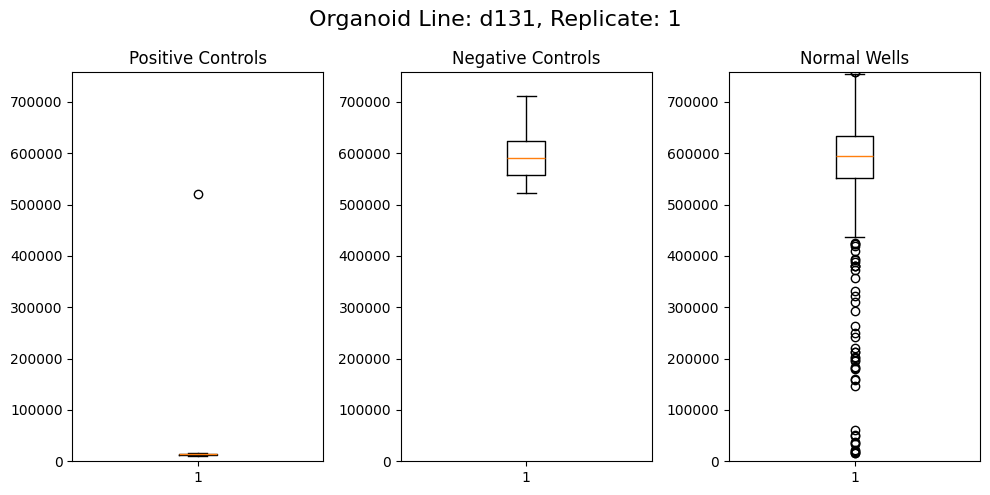

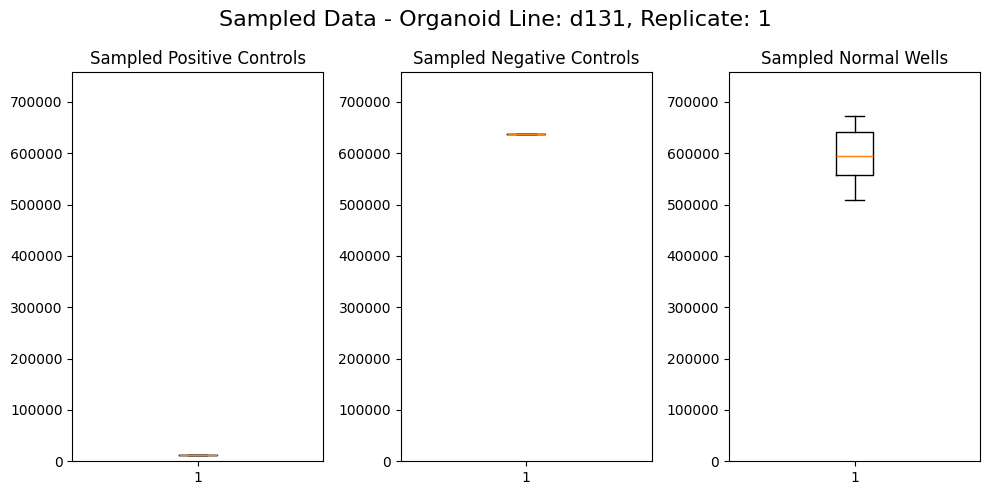

Found 76 positive controls, 122 negative controls, and 1338 normal wells for organoid line d131, replicate 2.
Sampled 1 positive controls, 1 negative controls, and 9 normal wells for organoid line d131, replicate 2.


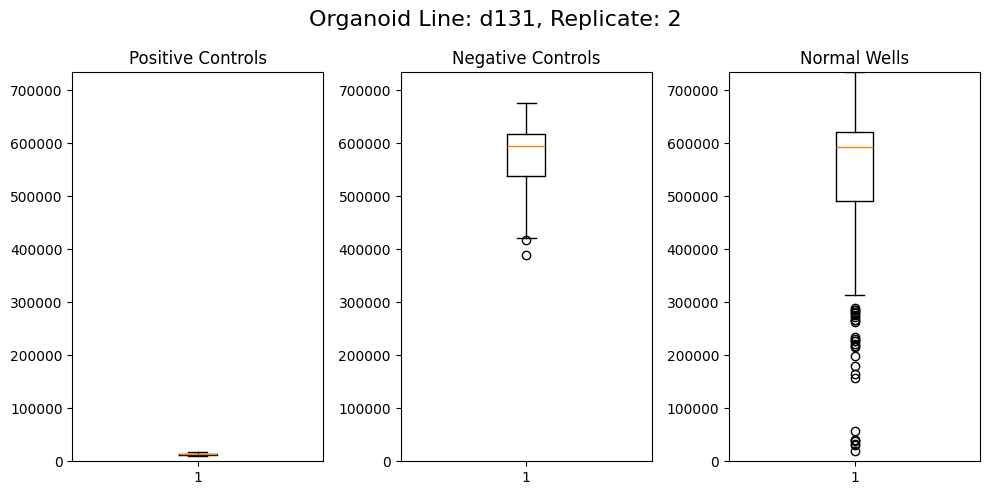

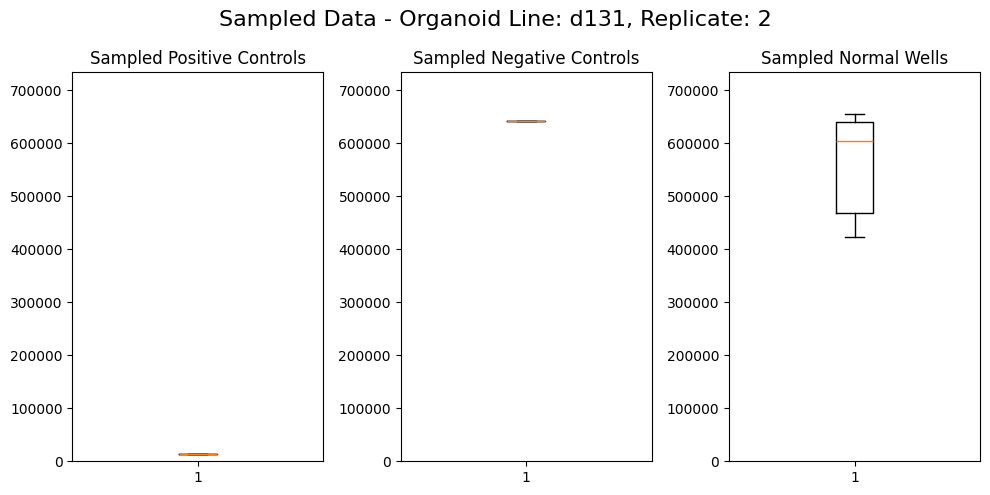

Found 76 positive controls, 122 negative controls, and 1338 normal wells for organoid line d192, replicate 1.
Sampled 1 positive controls, 1 negative controls, and 9 normal wells for organoid line d192, replicate 1.


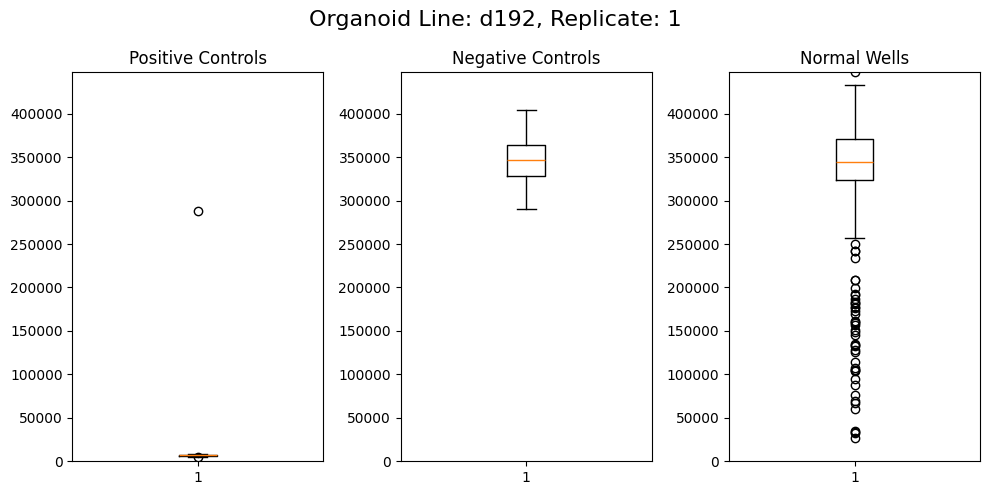

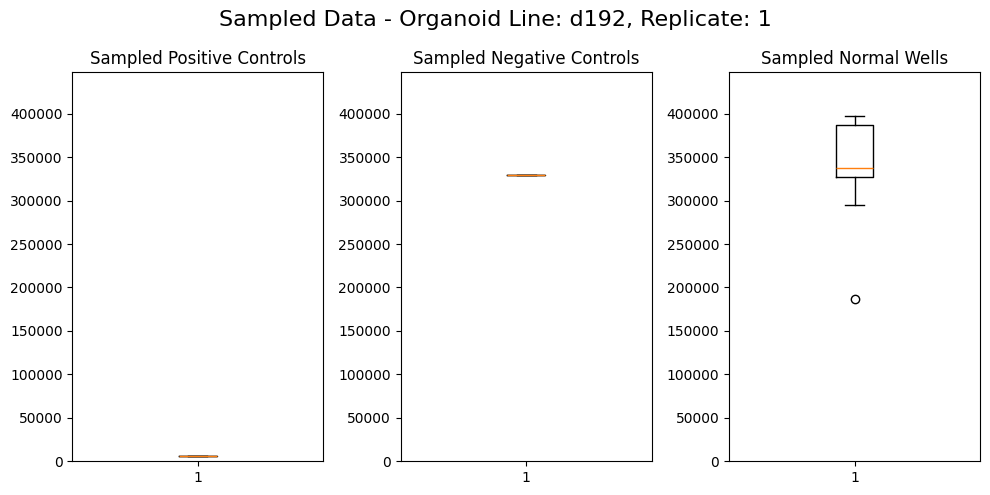

Found 76 positive controls, 122 negative controls, and 1338 normal wells for organoid line d192, replicate 2.
Sampled 1 positive controls, 1 negative controls, and 9 normal wells for organoid line d192, replicate 2.


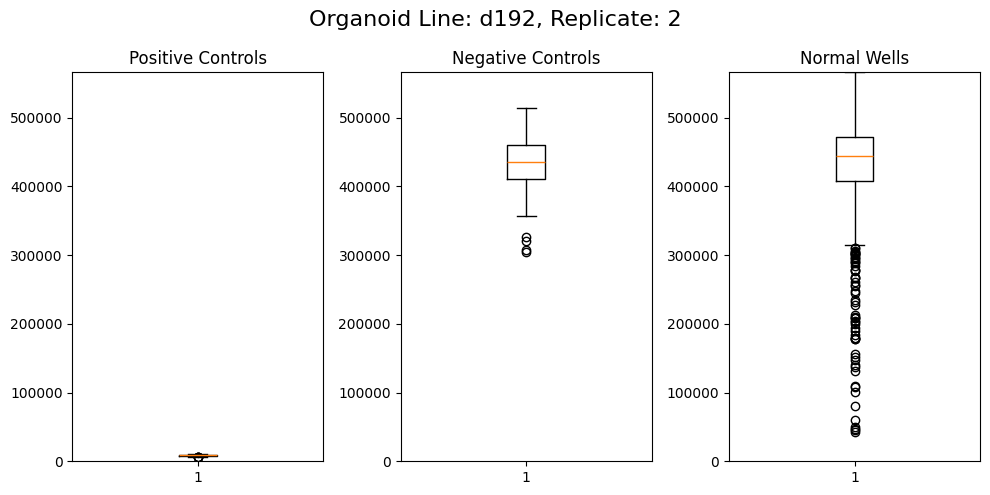

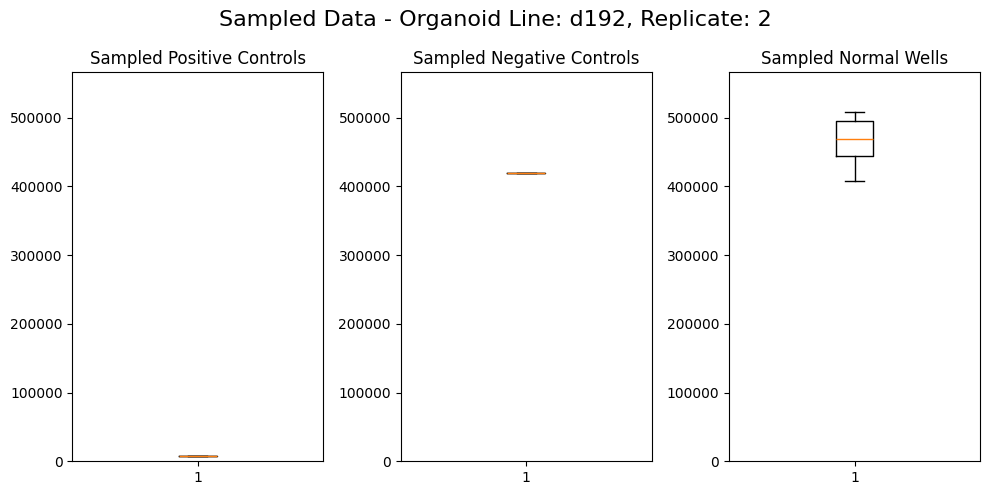

In [4]:
# sample data

for organoid_line, replicates in exp_folder.items():
    for replicate, plates in replicates.items():
        #sort the images based on their scope
        normal_wells = []
        normal_wells_ctg = []
        pos_contr_wells = []
        pos_contr_wells_ctg = []
        neg_contr_wells = []
        neg_contr_wells_ctg = []
        for plate, folder in plates.items():
            image_paths = get_image_paths(os.path.join(image_data_folder, folder))
            ctg = pd.read_csv(os.path.join(ctg_data_folder, ctg_file[organoid_line][replicate][plate]), sep="\t", header=None)
            for image_path in image_paths:
                well_name = get_well_name(image_path)
                # check if the well name is in the control wells
                if well_name in pos_controls["Well"].tolist():
                    pos_contr_wells.append(image_path)
                    pos_contr_wells_ctg.append(ctg[ctg[1] == well_name][2].values[0])
                elif well_name in neg_controls[neg_controls["Plate"] == int(plate)]["Well"].tolist():
                    neg_contr_wells.append(image_path)
                    neg_contr_wells_ctg.append(ctg[ctg[1] == well_name][2].values[0])
                else:
                    normal_wells.append(image_path)
                    normal_wells_ctg.append(ctg[ctg[1] == well_name][2].values[0])
        
        # sample the data
        print(f"Found {len(pos_contr_wells)} positive controls, {len(neg_contr_wells)} negative controls, and {len(normal_wells)} normal wells for organoid line {organoid_line}, replicate {replicate}.")
        sampled_pos = random.sample(pos_contr_wells, sample_control) if len(pos_contr_wells) >= sample_control else pos_contr_wells
        ctg_sampled_pos = [pos_contr_wells_ctg[pos_contr_wells.index(well)] for well in sampled_pos]
        sampled_neg = random.sample(neg_contr_wells, sample_control) if len(neg_contr_wells) >= sample_control else neg_contr_wells
        ctg_sampled_neg = [neg_contr_wells_ctg[neg_contr_wells.index(well)] for well in sampled_neg]
        sampled_normal = random.sample(normal_wells, sample_normal) if len(normal_wells) >= sample_normal else normal_wells
        sampled_normal_ctg = [normal_wells_ctg[normal_wells.index(well)] for well in sampled_normal]
        print(f"Sampled {len(sampled_pos)} positive controls, {len(sampled_neg)} negative controls, and {len(sampled_normal)} normal wells for organoid line {organoid_line}, replicate {replicate}.")
        sampled_data = sampled_pos + sampled_neg + sampled_normal

        fig, axes = plt.subplots(1, 3, figsize=(10, 5))
        fig.suptitle(f"Organoid Line: {organoid_line}, Replicate: {replicate}", fontsize=16)
        m = max(pos_contr_wells_ctg + neg_contr_wells_ctg + normal_wells_ctg)
        axes[0].set_title("Positive Controls")
        axes[0].boxplot(pos_contr_wells_ctg)
        axes[1].set_title("Negative Controls")
        axes[1].boxplot(neg_contr_wells_ctg)
        axes[2].set_title("Normal Wells")
        axes[2].boxplot(normal_wells_ctg)
        # three subplots have the same scale
        axes[0].set_ylim(0, m)
        axes[1].set_ylim(0, m)
        axes[2].set_ylim(0, m)
        plt.tight_layout()
        plt.show()

        # plot boxplots after sampling
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))
        fig.suptitle(f"Sampled Data - Organoid Line: {organoid_line}, Replicate: {replicate}", fontsize=16)
        axes[0].set_title("Sampled Positive Controls")
        axes[0].boxplot(ctg_sampled_pos)
        axes[1].set_title("Sampled Negative Controls")
        axes[1].boxplot(ctg_sampled_neg)
        axes[2].set_title("Sampled Normal Wells")
        axes[2].boxplot(sampled_normal_ctg)
        # three subplots have the same scale
        axes[0].set_ylim(0, m)
        axes[1].set_ylim(0, m)
        axes[2].set_ylim(0, m)
        plt.tight_layout()
        plt.show()


        # save the sampled data
        sampled_data_path  = os.path.join(output_folder, str(organoid_line) + "_" + str(replicate))
        shutil.rmtree(sampled_data_path, ignore_errors=True)  # clear the output folder
        os.makedirs(sampled_data_path, exist_ok=True)
        # copy and paste the sampled data into the file
        for image_path in sampled_data:
            shutil.copy(image_path, os.path.join(sampled_data_path, os.path.basename(image_path)))